In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

Gerenrating a sudo data set for plotting graphh

In [30]:
np.random.seed(42)

In [31]:
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
X.shape

(500, 2)

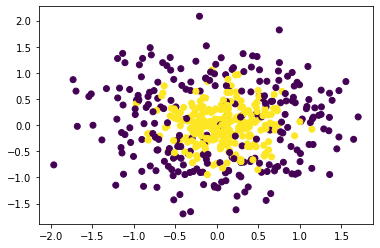

In [34]:
plt.scatter(X[:,0],X[:,1],c=y)

## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

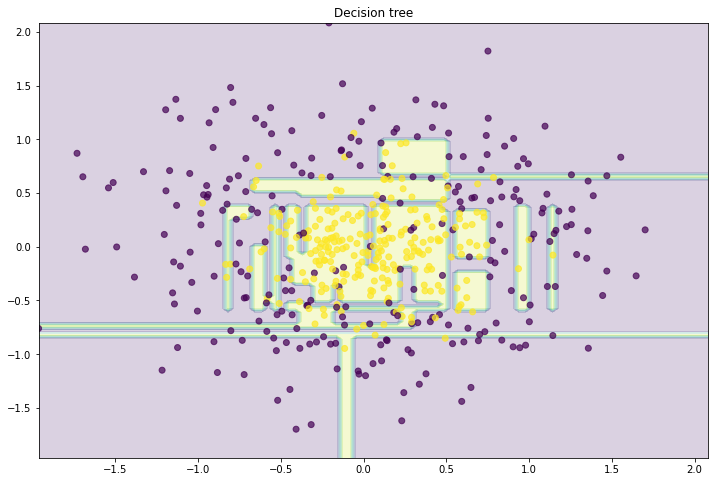

In [37]:
plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)

In [14]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

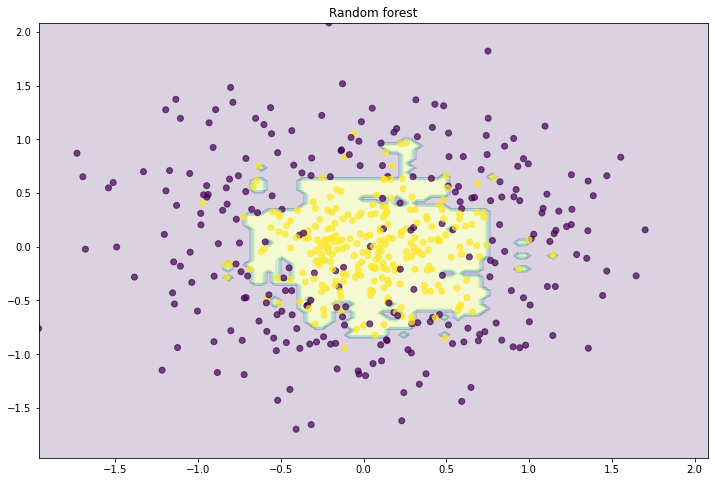

In [15]:
plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

In [16]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

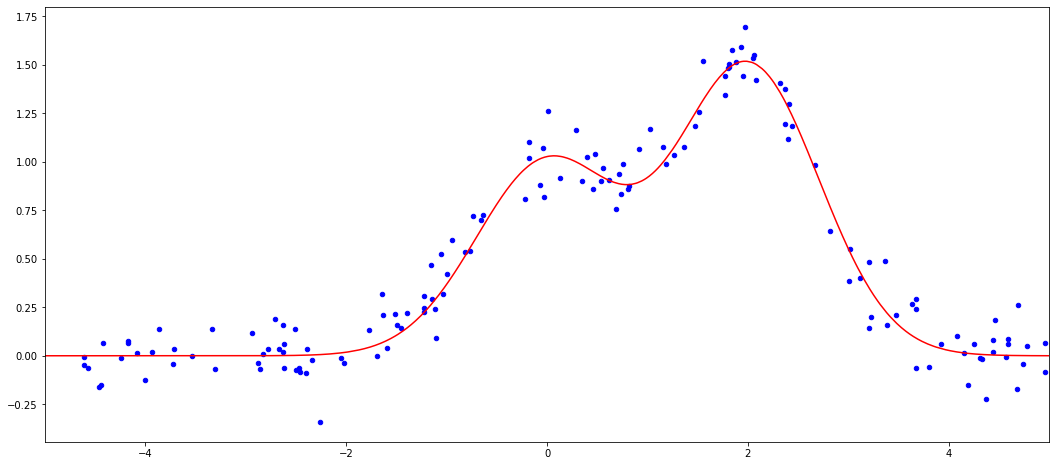

In [17]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

## One decision tree regressor

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dtree = DecisionTreeRegressor().fit(X_train, y_train)

In [20]:
d_predict = dtree.predict(X_test)

Text(0.5, 1.0, 'Decision tree, MSE = 22.70')

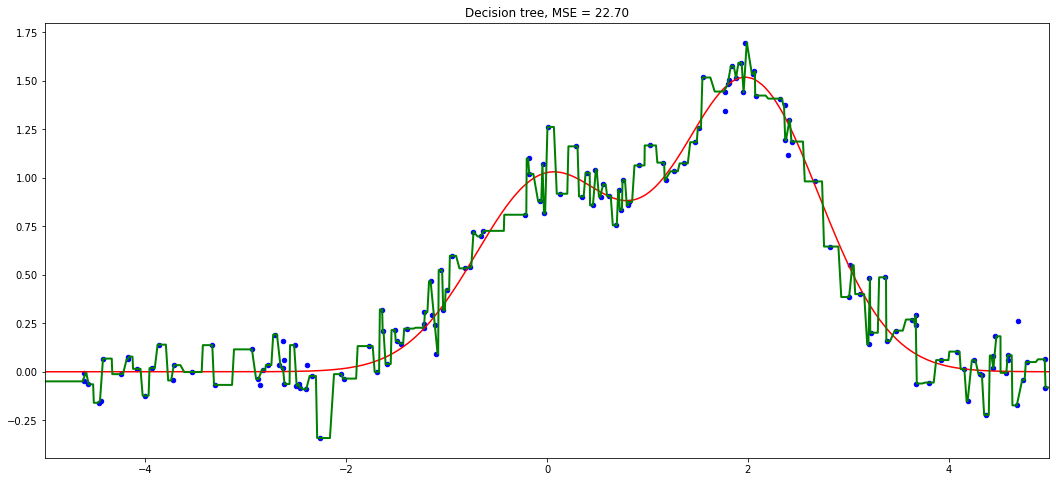

In [21]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

## Mean Square Error in Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)

In [24]:
rf_predict = rfr.predict(X_test)

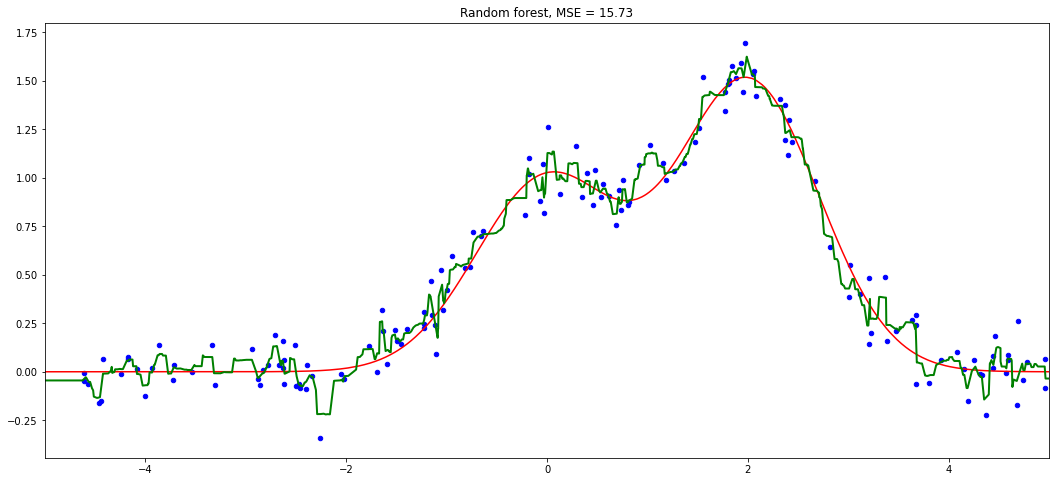

In [25]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

## Observations


1. From Scatter graph :<br/>
    **1.1** From the scatter graph of Decision tree and Randon forest we can make out that Decision Tree is more aggresive on Training data set to give as accurate result as possible which makes a case of overfitting.<br/>
    **1.2** The Random Forest on other hand has tried to give a generalised boundary of two categories and if comapred to Decision Tree, this will not be the case of overfitting.<br/>
<br/>

2. From Line graph :<br/>
    **2.1** Decision Tree in here is trying to attend every data point on the graph which will in return shell out a rough graph and will also be a case of overfitting.<br/>
    **2.2** Observed Mean Square Error in Decision Tree is '22.70'.<br/>
    **2.3** Random Forest in here is trying to generalize the graph and is not attending the extreem or outlier points which will in return shell out a regularfit graph.<br/>
    **2.4** Observed Mean Square Error in Random Forest is '15.73'.

## Why did Random Forest performs well than Decision Tree?

There are two reason for the above: <br/>
1. Random Forest does **Node Level column sampling** and not **Tree Level data sampling** like in Decision Tree. <br/>
2. Even though in most cases of Machine Learning algorithum we can control either one of two i.e. Bais or Variance but in Random Forest both can be controlled.